# Comparación de algoritmos de Series de Tiempo aplicados a diferentes tipos de conjuntos de datos

## Objetivos del Laboratorio:
1. Familiarizar a los estudiantes con diferentes algoritmos de series de tiempo.
2. Comprender cuándo y cómo aplicar distintos algoritmos dependiendo de las
características de la serie de tiempo (tendencia, estacionalidad).
3. Evaluar el rendimiento de los algoritmos utilizando métricas de evaluación
apropiadas.
Herramientas Requeridas:
* Python (pandas, numpy, matplotlib, scikit-learn, statsmodels, Prophet, TensorFlow,
darts, etc.)
* Jupyter Notebook o Google Colab
* Conjuntos de datos proporcionados para el laboratorio

## Instrucciones:
* Conjunto de Datos 1: daily-total-female-births.csv
* Conjunto de Datos 2: monthly-car-sales.csv
* Conjunto de Datos 3: monthly-mean-temp.csv
* Conjunto de Datos 4: shampoo.csv

Para cada conjunto de datos, realizar lo siguiente:

1. Análisis Exploratorio:
• Describir la serie de tiempo y visualizarla.
2. Promedios:
• Aplicar métodos de promedios y comparar los resultados con el conjunto original.
3. SARIMA:
• Identificar parámetros y ajustar un modelo SARIMA.
4. Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.
5. Prophet:
• Utilizar Prophet para modelar la serie de tiempo.
6. Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo.
7. Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.
• Discutir cuál algoritmo se desempeña mejor para cada tipo de conjunto de datos y
por qué.

### Librerias necesarias para el Laboratorio 3

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import tensorflow as tf
from prophet import Prophet
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Conjunto de Datos 1: daily-total-female-births.csv

### 1.) Análisis Exploratorio:
* Describir la serie de tiempo y visualizarla.


         Date  Births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
           Births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000


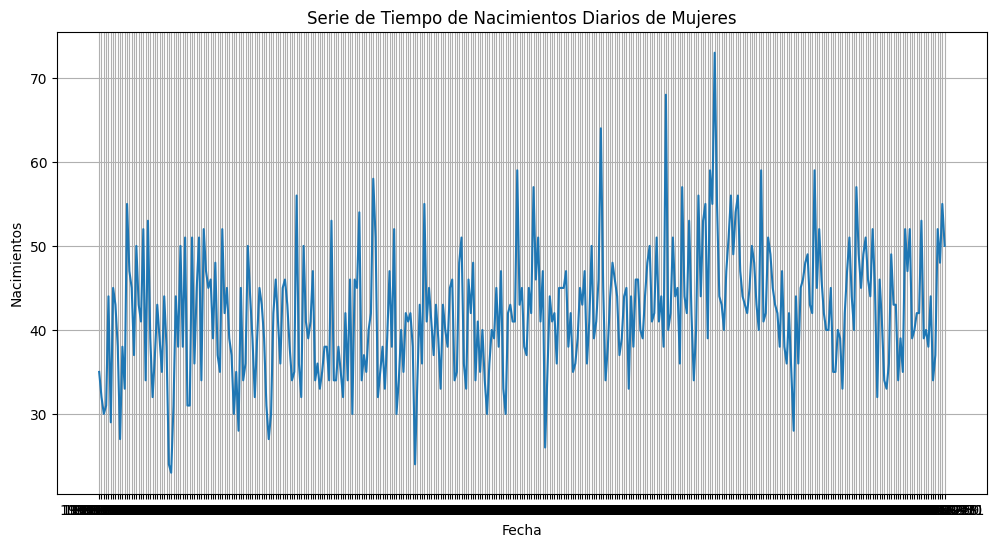

In [2]:
data = pd.read_csv("./Datos/daily-total-female-births.csv")

print(data.head())

print(data.describe())

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

### 2.) Promedios:
* Aplicar métodos de promedios y comparar los resultados con el conjunto original.

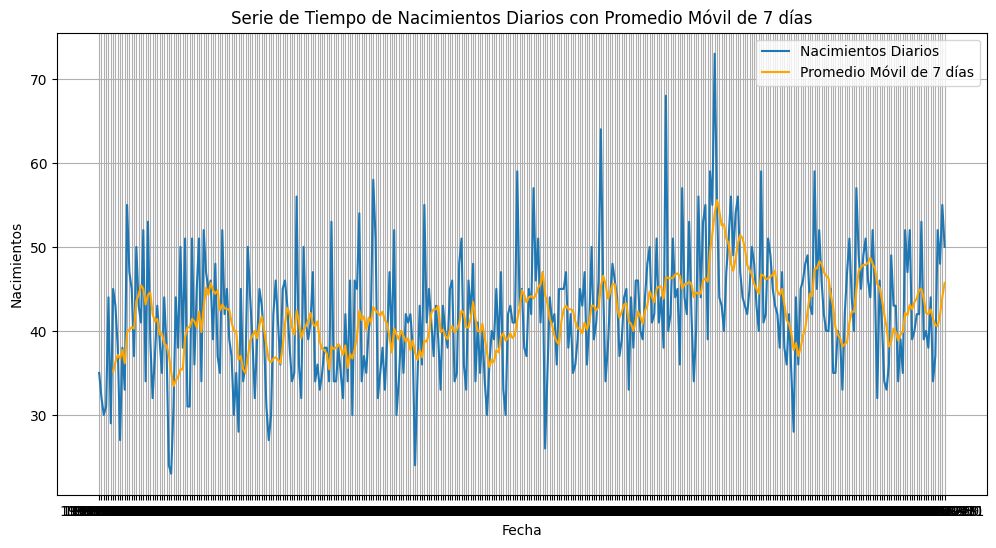

In [3]:
data['Moving_Average_7days'] = data['Births'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Births'], label='Nacimientos Diarios')
plt.plot(data['Date'], data['Moving_Average_7days'], label='Promedio Móvil de 7 días', color='orange')
plt.title('Serie de Tiempo de Nacimientos Diarios con Promedio Móvil de 7 días')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()


### 3.) SARIMA:
* Identificar parámetros y ajustar un modelo SARIMA.

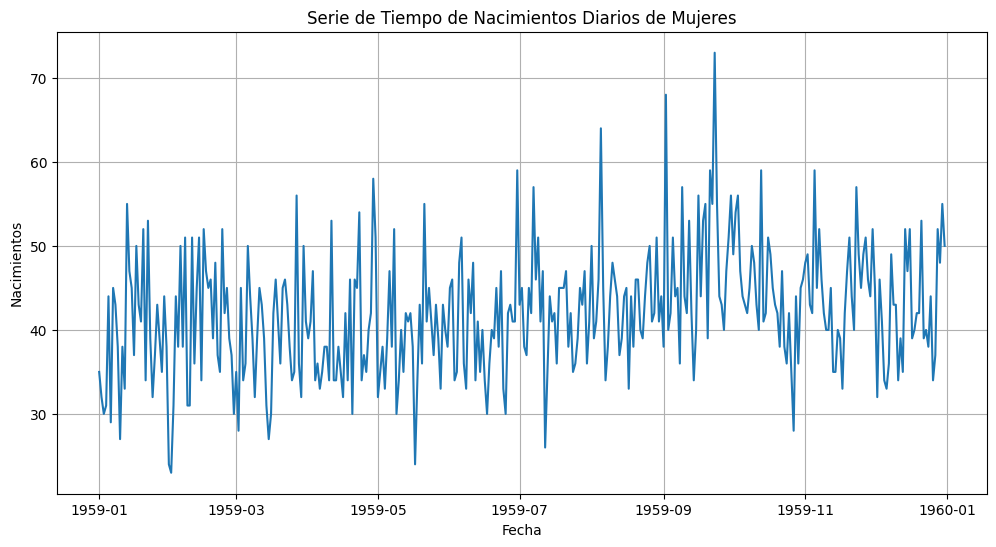

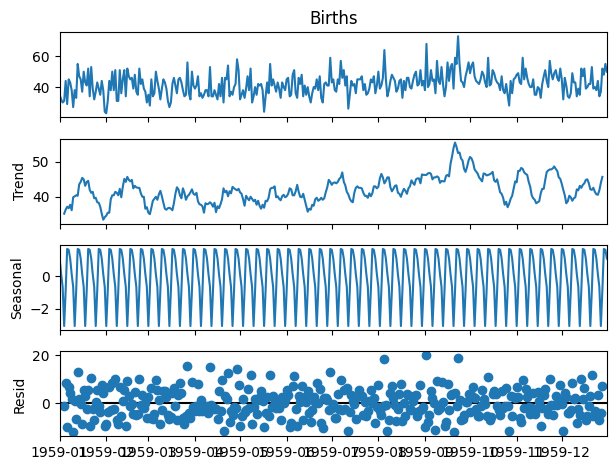

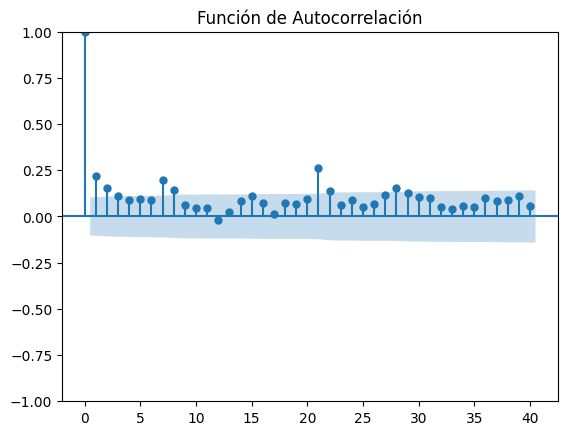

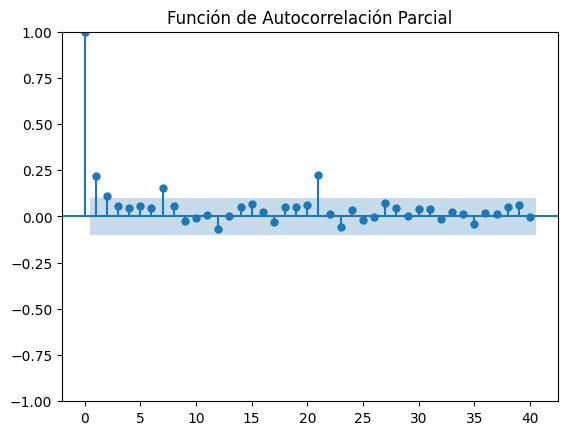

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Births'], model='additive')
result.plot()
plt.show()

plot_acf(data['Births'], lags=40)
plt.title('Función de Autocorrelación')
plt.show()

plot_pacf(data['Births'], lags=40)
plt.title('Función de Autocorrelación Parcial')
plt.show()


In [5]:
sarima_model = sm.tsa.SARIMAX(data['Births'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 365))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                      
Dep. Variable:                              Births   No. Observations:                  365
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 365)   Log Likelihood               -1234.216
Date:                             Mon, 04 Sep 2023   AIC                           2478.433
Time:                                     12:36:10   BIC                           2497.932
Sample:                                 01-01-1959   HQIC                          2486.182
                                      - 12-31-1959                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.001   1139.603      0.000       0.998       1.002
ma.L1         -0.9475      

### 4.) Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.

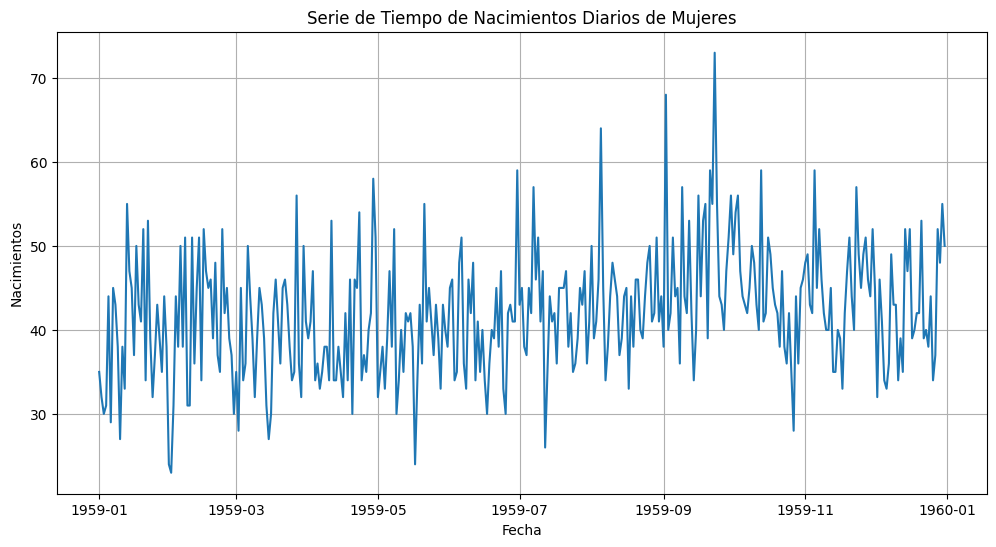

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Temp\ipykernel_16444\2448109169.py:15: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Temp\ipykernel_16444\2448109169.py:18: FutureWarning: the 'damped' keyword is deprecated,

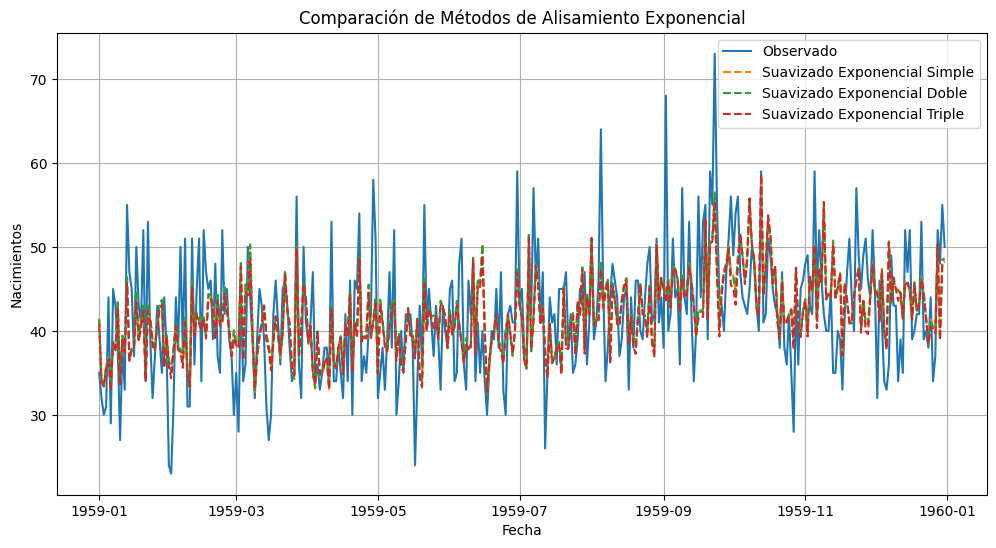

In [6]:

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Births'])
plt.title('Serie de Tiempo de Nacimientos Diarios de Mujeres')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()

exp_smoothing_simple = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100)
exp_smoothing_simple_fit = exp_smoothing_simple.fit()

exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True)
exp_smoothing_double_fit = exp_smoothing_double.fit()

exp_smoothing_triple = sm.tsa.ExponentialSmoothing(data['Births'], trend='add', seasonal='add', seasonal_periods=100, damped=True, use_boxcox=True)
exp_smoothing_triple_fit = exp_smoothing_triple.fit()

plt.figure(figsize=(12, 6))
plt.plot(data['Births'], label='Observado')
plt.plot(exp_smoothing_simple_fit.fittedvalues, label='Suavizado Exponencial Simple', linestyle='--')
plt.plot(exp_smoothing_double_fit.fittedvalues, label='Suavizado Exponencial Doble', linestyle='--')
plt.plot(exp_smoothing_triple_fit.fittedvalues, label='Suavizado Exponencial Triple', linestyle='--')
plt.title('Comparación de Métodos de Alisamiento Exponencial')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()


### 5.) Prophet:
• Utilizar Prophet para modelar la serie de tiempo.

12:36:24 - cmdstanpy - INFO - Chain [1] start processing
12:36:24 - cmdstanpy - INFO - Chain [1] done processing


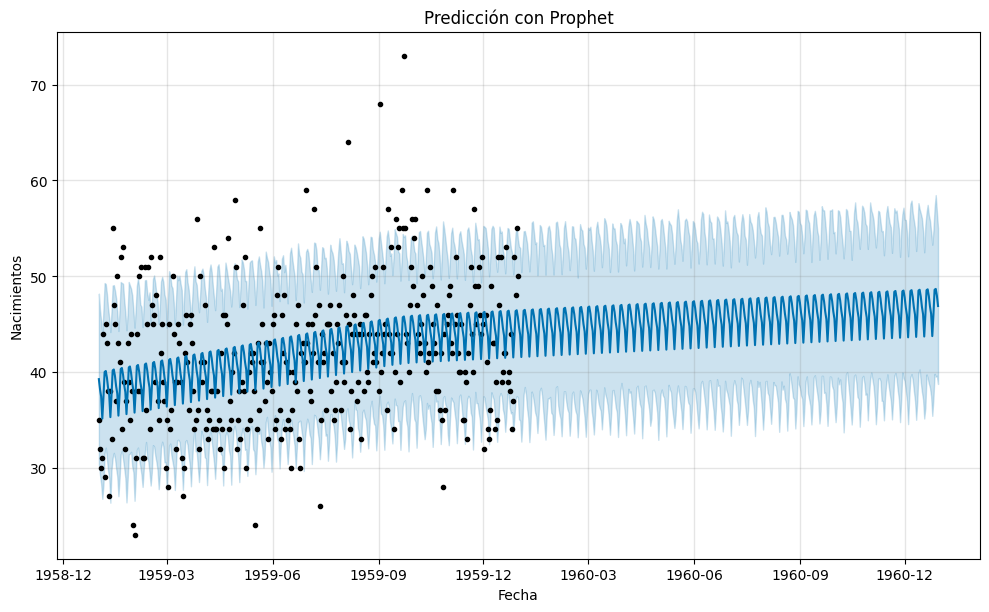

In [7]:

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.rename(columns={'Date': 'ds', 'Births': 'y'})
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.grid(True)
plt.show()


### 6.) Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo.

In [8]:
def create_sequences(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 0.8112
Epoch 2/100
18/18 [==============================] - 0s 944us/step - loss: 0.4928
Epoch 3/100
18/18 [==============================] - 0s 737us/step - loss: 0.2889
Epoch 4/100
18/18 [==============================] - 0s 941us/step - loss: 0.1602
Epoch 5/100
18/18 [==============================] - 0s 809us/step - loss: 0.0846
Epoch 6/100
18/18 [==============================] - 0s 765us/step - loss: 0.0460
Epoch 7/100
18/18 [==============================] - 0s 706us/step - loss: 0.0317
Epoch 8/100
18/18 [==============================] - 0s 706us/step - loss: 0.0279
Epoch 9/100
18/18 [==============================] - 0s 706us/step - loss: 0.0268
Epoch 10/100
18/18 [==============================] - 0s 706us/step - loss: 0.0265
Epoch 11/100
18/18 [==============================] - 0s 706us/step - loss: 0.0262
Epoch 12/100
18/18 [==============================] - 0s 648us/step - loss: 0.0258
Epoch 13/100
18

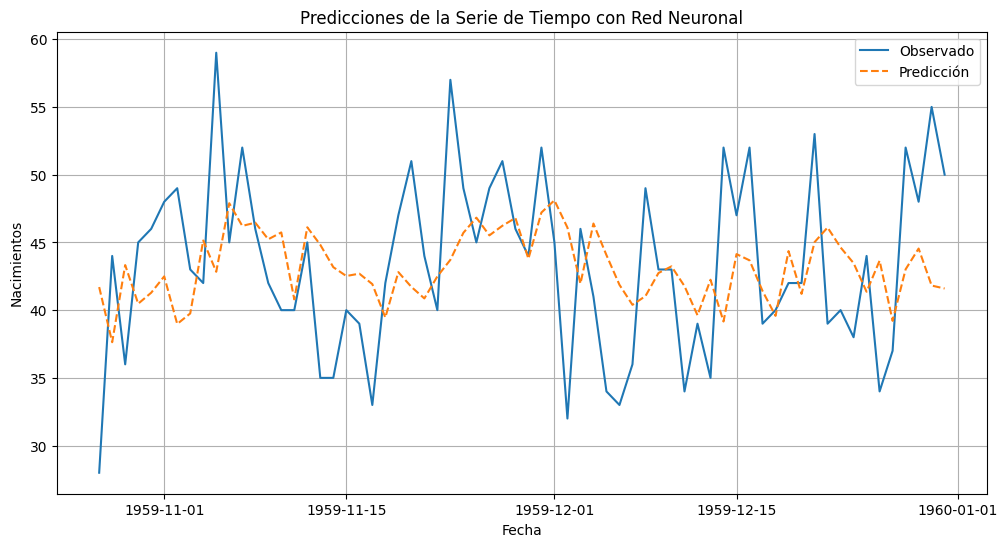

In [9]:
data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

scaler = MinMaxScaler()
data['Scaled_Births'] = scaler.fit_transform(data[['Births']])
train_size = int(len(data) * 0.80)
train_data = data.iloc[:train_size]['Scaled_Births'].values
test_data = data.iloc[train_size:]['Scaled_Births'].values
look_back = 7
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(look_back,)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
rmse = sqrt(mean_squared_error(data.iloc[(train_size + look_back):]['Births'], test_predictions))
print(f'Error Cuadrático Medio en el Conjunto de Prueba: {rmse}')
plt.figure(figsize=(12, 6))
plt.plot(data.index[(train_size + look_back):], data.iloc[(train_size + look_back):]['Births'], label='Observado')
plt.plot(data.index[(train_size + look_back):], test_predictions, label='Predicción', linestyle='--')
plt.title('Predicciones de la Serie de Tiempo con Red Neuronal')
plt.xlabel('Fecha')
plt.ylabel('Nacimientos')
plt.legend()
plt.grid(True)
plt.show()


### 7.) Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.

In [10]:
""" Modelo SARIMA """

from statsmodels.tools.eval_measures import rmse, meanabs
sarima_predictions = sarima_results.get_prediction(start=0, end=len(data)-1)
sarima_forecast = sarima_predictions.predicted_mean
sarima_rmse = rmse(data['Births'], sarima_forecast)
sarima_mae = meanabs(data['Births'], sarima_forecast)

print(f'RMSE del modelo SARIMA: {sarima_rmse:.2f}')
print(f'MAE del modelo SARIMA: {sarima_mae:.2f}')


RMSE del modelo SARIMA: 7.30
MAE del modelo SARIMA: 5.66


In [11]:
""" Red neuronal Simple """
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
nn_rmse = sqrt(mean_squared_error(data.iloc[(train_size + look_back):]['Births'], test_predictions))
nn_mae = mean_absolute_error(data.iloc[(train_size + look_back):]['Births'], test_predictions)

print(f'RMSE de la Red Neuronal Simple: {nn_rmse:.2f}')
print(f'MAE de la Red Neuronal Simple: {nn_mae:.2f}')


RMSE de la Red Neuronal Simple: 6.69
MAE de la Red Neuronal Simple: 5.45


In [12]:
""" Prophet """

data = pd.read_csv("./Datos/daily-total-female-births.csv")
data['Date'] = pd.to_datetime(data['Date'])
data = data.rename(columns={'Date': 'ds', 'Births': 'y'})
train_data = data.iloc[:-65]
test_data = data.iloc[-65:]
model = Prophet()
model.fit(train_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
predicted_values = forecast.iloc[-65:]['yhat']
rmse = np.sqrt(mean_squared_error(test_data['y'], predicted_values))
mae = mean_absolute_error(test_data['y'], predicted_values)

print(f"RMSE de Prophet: {rmse:.2f}")
print(f"MAE de Prophet: {mae:.2f}")

12:36:37 - cmdstanpy - INFO - Chain [1] start processing
12:36:37 - cmdstanpy - INFO - Chain [1] done processing


RMSE de Prophet: 15.27
MAE de Prophet: 13.77


## Conjunto de Datos 2: monthly-car-sales.csv

### 1.) Análisis Exploratorio:
* Describir la serie de tiempo y visualizarla.


     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587
              Sales
count    108.000000
mean   14595.111111
std     4525.213913
min     5568.000000
25%    11391.250000
50%    14076.000000
75%    17595.750000
max    26099.000000


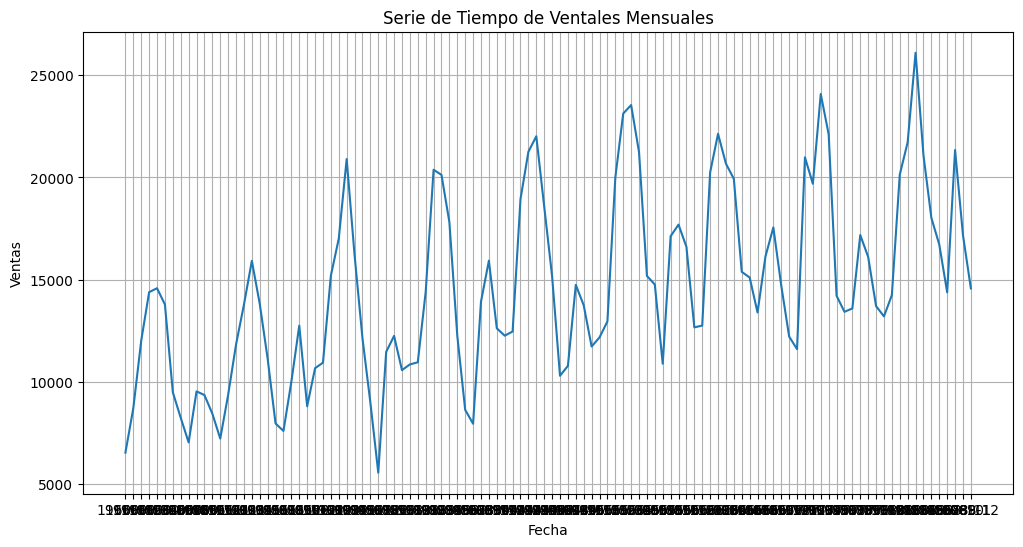

In [14]:
data = pd.read_csv("./Datos/monthly-car-sales.csv")

print(data.head())

print(data.describe())

plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Sales'])
plt.title('Serie de Tiempo de Ventales Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

### 2.) Promedios:
* Aplicar métodos de promedios y comparar los resultados con el conjunto original.

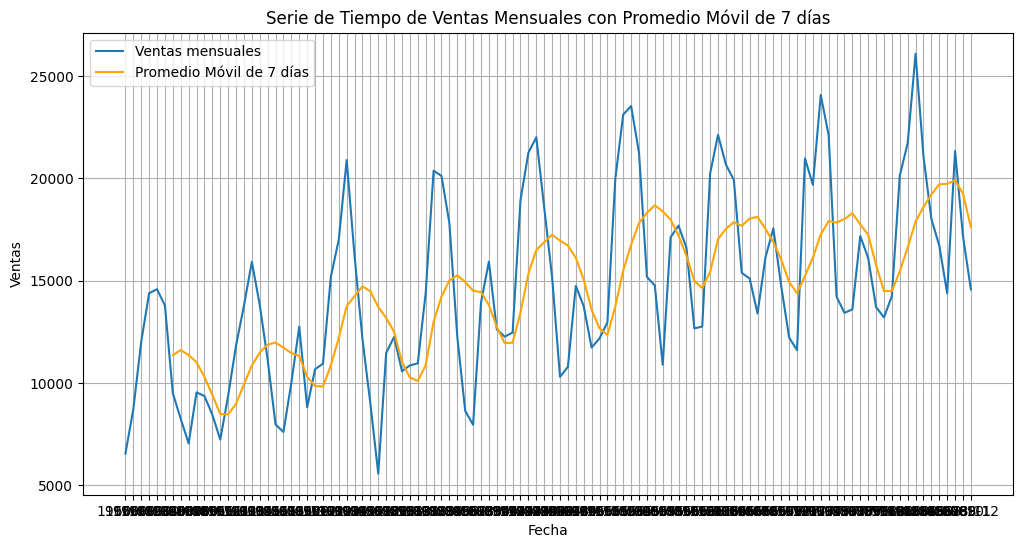

In [15]:
data['Moving_Average_7days'] = data['Sales'].rolling(window=7).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Month'], data['Sales'], label='Ventas mensuales')
plt.plot(data['Month'], data['Moving_Average_7days'], label='Promedio Móvil de 7 días', color='orange')
plt.title('Serie de Tiempo de Ventas Mensuales con Promedio Móvil de 7 meses')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()


### 3.) SARIMA:
* Identificar parámetros y ajustar un modelo SARIMA.

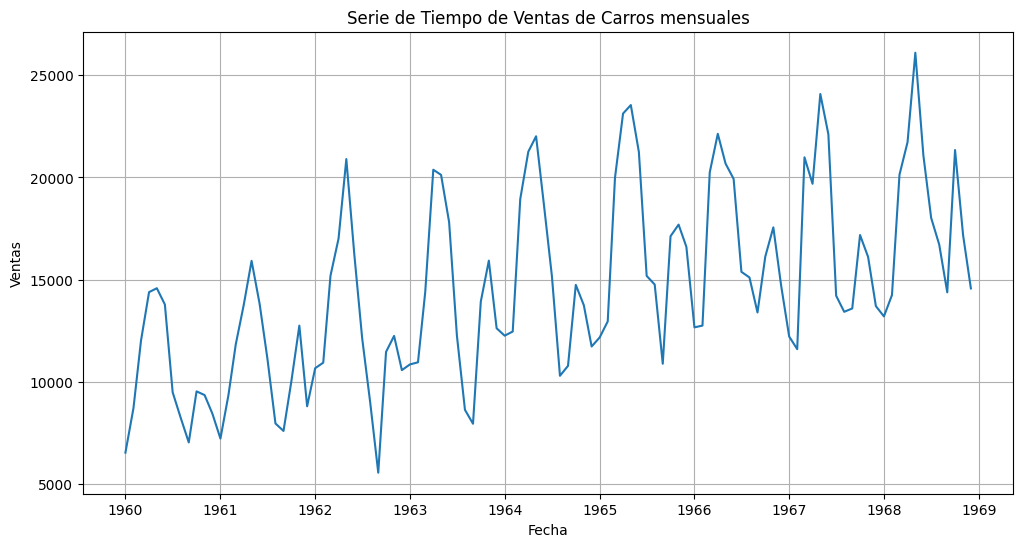

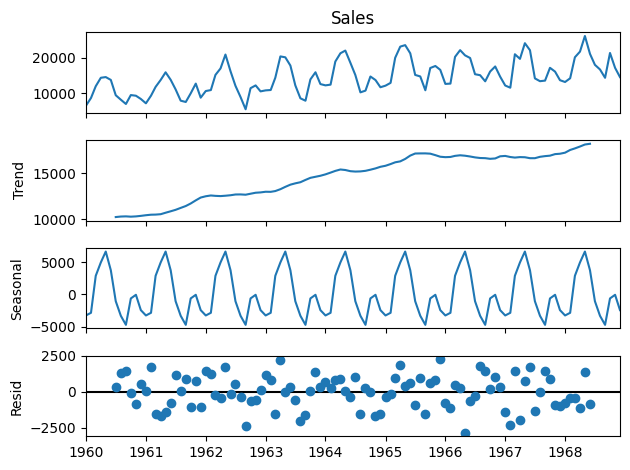

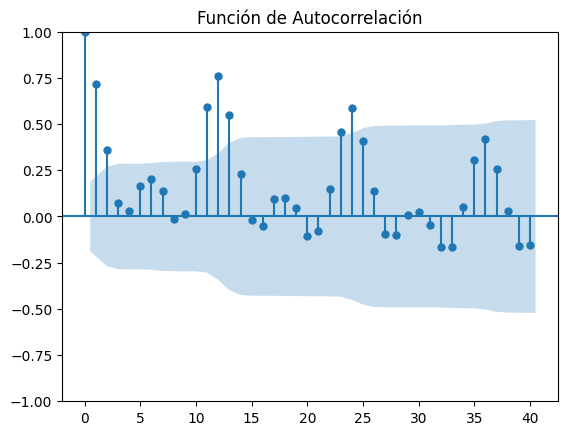

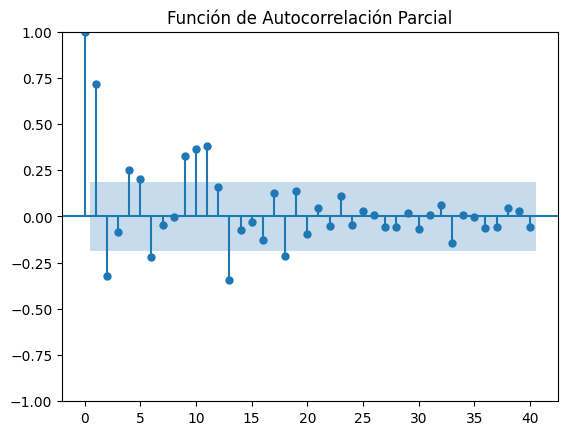

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

data = pd.read_csv("./Datos/monthly-car-sales.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data['Sales'])
plt.title('Serie de Tiempo de Ventas de Carros mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

result = seasonal_decompose(data['Sales'], model='additive')
result.plot()
plt.show()

plot_acf(data['Sales'], lags=40)
plt.title('Función de Autocorrelación')
plt.show()

plot_pacf(data['Sales'], lags=40)
plt.title('Función de Autocorrelación Parcial')
plt.show()


In [17]:
sarima_model = sm.tsa.SARIMAX(data['Sales'], order=(1, 0, 1), seasonal_order=(1, 0, 1, 365))
sarima_results = sarima_model.fit()
print(sarima_results.summary())

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                      
Dep. Variable:                               Sales   No. Observations:                  108
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 365)   Log Likelihood               -1027.598
Date:                             Mon, 04 Sep 2023   AIC                           2065.197
Time:                                     12:52:02   BIC                           2078.608
Sample:                                 01-01-1960   HQIC                          2070.634
                                      - 12-01-1968                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9650      0.026     36.714      0.000       0.913       1.016
ma.L1          0.1800      

### 4.) Alisamiento Exponencial:
• Aplicar diferentes métodos de alisamiento exponencial y comparar.

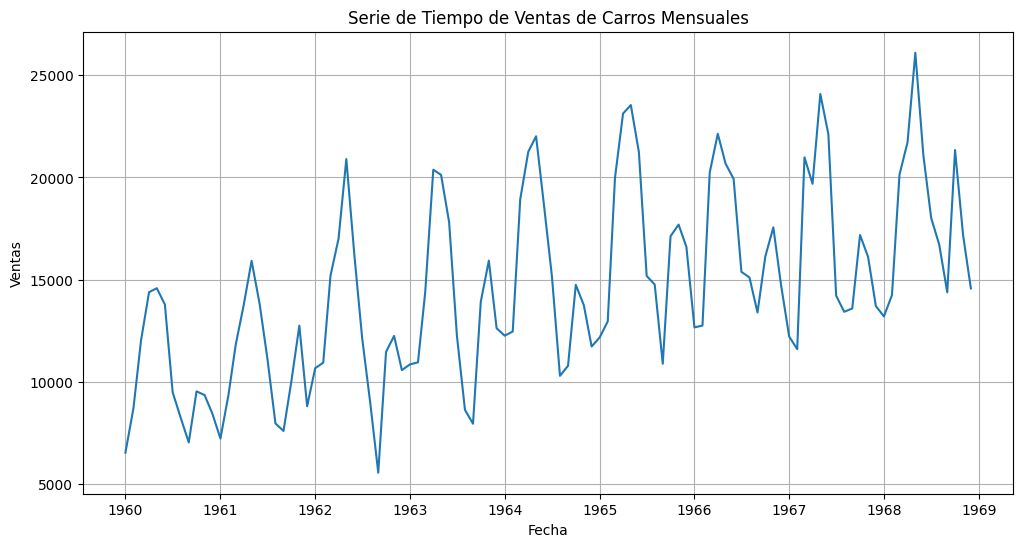

C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\charl\AppData\Local\Temp\ipykernel_16444\3837863263.py:15: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=50, damped=True)
C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels

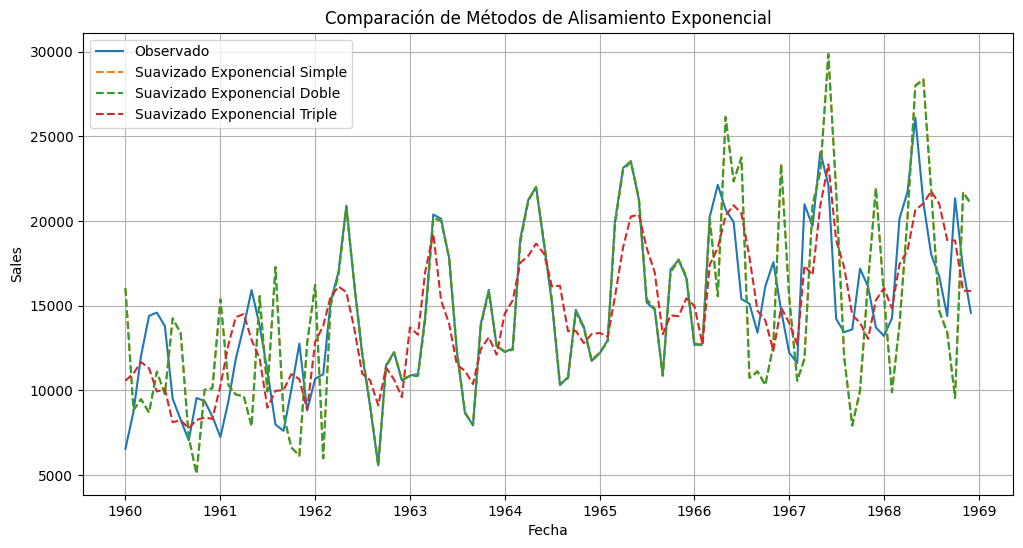

In [19]:

data = pd.read_csv("./Datos/monthly-car-sales.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(data['Sales'])
plt.title('Serie de Tiempo de Ventas de Carros Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

exp_smoothing_simple = sm.tsa.ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=50)
exp_smoothing_simple_fit = exp_smoothing_simple.fit()

exp_smoothing_double = sm.tsa.ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=50, damped=True)
exp_smoothing_double_fit = exp_smoothing_double.fit()

exp_smoothing_triple = sm.tsa.ExponentialSmoothing(data['Sales'], trend='add', seasonal='add', seasonal_periods=50, damped=True, use_boxcox=True)
exp_smoothing_triple_fit = exp_smoothing_triple.fit()

plt.figure(figsize=(12, 6))
plt.plot(data['Sales'], label='Observado')
plt.plot(exp_smoothing_simple_fit.fittedvalues, label='Suavizado Exponencial Simple', linestyle='--')
plt.plot(exp_smoothing_double_fit.fittedvalues, label='Suavizado Exponencial Doble', linestyle='--')
plt.plot(exp_smoothing_triple_fit.fittedvalues, label='Suavizado Exponencial Triple', linestyle='--')
plt.title('Comparación de Métodos de Alisamiento Exponencial')
plt.xlabel('Fecha')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


### 5.) Prophet:
• Utilizar Prophet para modelar la serie de tiempo.

12:56:01 - cmdstanpy - INFO - Chain [1] start processing
12:56:01 - cmdstanpy - INFO - Chain [1] done processing


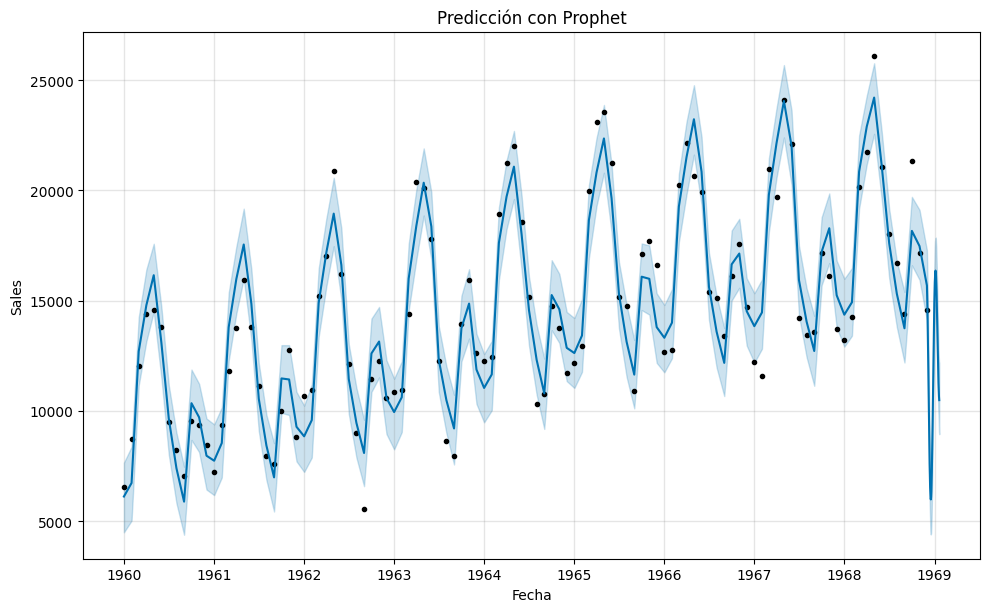

In [20]:

data = pd.read_csv("./Datos/monthly-car-sales.csv")
data['Month'] = pd.to_datetime(data['Month'])
data = data.rename(columns={'Month': 'ds', 'Sales': 'y'})
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=50)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title('Predicción con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


### 6.) Redes Neuronales:
• Implementar una red neuronal simple para prever la serie de tiempo.

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 1.3668
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 1.2255
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 1.0896
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.9644
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8503
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.7482
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5596
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.4850
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4117
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.3485
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.2922
Epoch 13/100
5/5 [==============================] - 0s 2ms/st

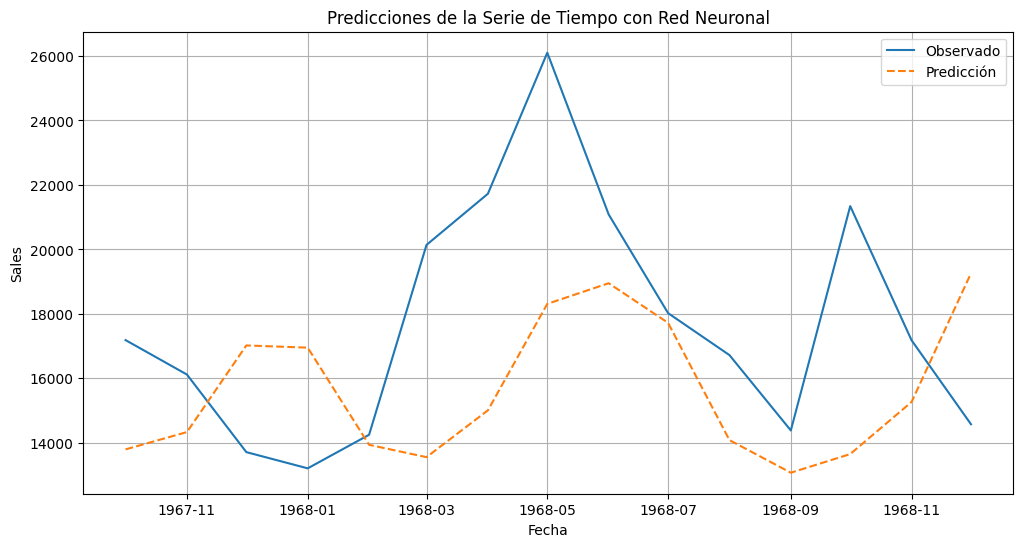

In [21]:
data = pd.read_csv("./Datos/monthly-car-sales.csv")
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

scaler = MinMaxScaler()
data['Scaled_Sales'] = scaler.fit_transform(data[['Sales']])
train_size = int(len(data) * 0.80)
train_data = data.iloc[:train_size]['Scaled_Sales'].values
test_data = data.iloc[train_size:]['Scaled_Sales'].values
look_back = 7
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(look_back,)),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
rmse = sqrt(mean_squared_error(data.iloc[(train_size + look_back):]['Sales'], test_predictions))
print(f'Error Cuadrático Medio en el Conjunto de Prueba: {rmse}')
plt.figure(figsize=(12, 6))
plt.plot(data.index[(train_size + look_back):], data.iloc[(train_size + look_back):]['Sales'], label='Observado')
plt.plot(data.index[(train_size + look_back):], test_predictions, label='Predicción', linestyle='--')
plt.title('Predicciones de la Serie de Tiempo con Red Neuronal')
plt.xlabel('Fecha')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


### 7.) Comparación y Evaluación:
• Usar métricas como RMSE, MAE para comparar los modelos.

In [22]:
""" Modelo SARIMA """

from statsmodels.tools.eval_measures import rmse, meanabs
sarima_predictions = sarima_results.get_prediction(start=0, end=len(data)-1)
sarima_forecast = sarima_predictions.predicted_mean
sarima_rmse = rmse(data['Sales'], sarima_forecast)
sarima_mae = meanabs(data['Sales'], sarima_forecast)

print(f'RMSE del modelo SARIMA: {sarima_rmse:.2f}')
print(f'MAE del modelo SARIMA: {sarima_mae:.2f}')


RMSE del modelo SARIMA: 3293.10
MAE del modelo SARIMA: 2531.37


In [23]:
""" Red neuronal Simple """
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
nn_rmse = sqrt(mean_squared_error(data.iloc[(train_size + look_back):]['Sales'], test_predictions))
nn_mae = mean_absolute_error(data.iloc[(train_size + look_back):]['Sales'], test_predictions)

print(f'RMSE de la Red Neuronal Simple: {nn_rmse:.2f}')
print(f'MAE de la Red Neuronal Simple: {nn_mae:.2f}')


RMSE de la Red Neuronal Simple: 4372.79
MAE de la Red Neuronal Simple: 3619.08


In [25]:
""" Prophet """

data = pd.read_csv("./Datos/monthly-car-sales.csv")
data['Month'] = pd.to_datetime(data['Month'])
data = data.rename(columns={'Month': 'ds', 'Sales': 'y'})
train_data = data.iloc[:-65]
test_data = data.iloc[-65:]
model = Prophet()
model.fit(train_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
predicted_values = forecast.iloc[-65:]['yhat']
rmse = np.sqrt(mean_squared_error(test_data['y'], predicted_values))
mae = mean_absolute_error(test_data['y'], predicted_values)

print(f"RMSE de Prophet: {rmse:.2f}")
print(f"MAE de Prophet: {mae:.2f}")

13:07:53 - cmdstanpy - INFO - Chain [1] start processing
13:07:53 - cmdstanpy - INFO - Chain [1] done processing


RMSE de Prophet: 11377.83
MAE de Prophet: 9572.29
